# 67373视频推荐系统

In [1]:
import re

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
import jieba
import jieba.analyse
jieba.analyse.set_stop_words('stopwords.txt')

In [4]:
d = dict()
with open("dataset/dataset.txt", "r", encoding="utf-8") as f:
    for line in f.readlines():
        title, cate_name, _, duration, _, video_id = line.split(",")
        
        # preprocessing
        video_id = video_id.strip() # Trim
        cate_name = re.sub("视频|-|直播", "", cate_name) # Clean up
        title = re.sub("\[\d\d\d\d-\d\d-\d\d\]", "", title) # ex. remove timestamp "[2021-06-26]""
        
        
        d[video_id] = pd.Series([cate_name, title, round(float(duration), 0)], index=["category", "title", "duration"])


In [5]:
df = pd.DataFrame(d).T

In [6]:
df.head(2)

,category,title,duration
fbfd75a8565548729695211ecaa7d4f6,回放,直播回放,17233.0
0c969febd3b14e17b8166cad069d5e6f,唱歌,童话镇,262.0


In [7]:
df["category"].unique()

array(['回放', '唱歌', '剪辑', '日常', '茶话会文字', '游戏'], dtype=object)

<AxesSubplot:title={'center':'duration'}, xlabel='category'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


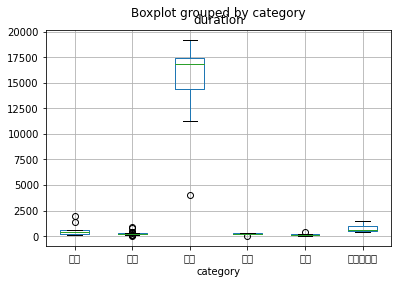

In [8]:
ax = df.boxplot(column=['duration'], by='category')

# df[df["category"] == '回放'] # 回放和别的类别不一样，建议以后回放多了单独做

import warnings
warnings.filterwarnings("ignore")
ax

In [9]:
for index, row in df.iterrows():
    tags = jieba.analyse.extract_tags(row["title"], withWeight=True)
    for tag, weight in tags:
        df.loc[index, tag] = weight

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wz/pjx749c12c56m80kx2p4rk_c0000gn/T/jieba.cache
Loading model cost 0.660 seconds.
Prefix dict has been built successfully.


In [10]:
df = df.fillna(0)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
df[['duration']] = MinMaxScaler().fit_transform(df[['duration']])

In [13]:
df

,category,title,duration,回放,直播,童话,大龄,之歌,文艺,青年,...,麦浪,风吹,分手,快乐,夜归人,冬季,乘客,茶汤,山茶,暧昧
fbfd75a8565548729695211ecaa7d4f6,回放,直播回放,0.896791,5.081504,4.552444,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
0c969febd3b14e17b8166cad069d5e6f,唱歌,童话镇,0.012608,0.000000,0.000000,9.048647,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
eca9a80de506458396db96343871c4a9,唱歌,我们,0.010212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
63e429e8c91f4651b19367196e42d1c5,唱歌,大龄文艺女青年之歌,0.010733,0.000000,0.000000,0.000000,2.899523,2.252582,1.965702,1.587241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
4dc8d7d82ff946809868b9ca728e8e6d,唱歌,大鱼,0.015369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53a5981f21e94a31b23ac973d98f7516,唱歌,白山茶,0.011149,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.666571,0.00000
a0fa769f2f3844aeaa9c62186648bfb6,唱歌,安和桥,0.047098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
12e892a77f934c13973bd08790bce53b,唱歌,爱情,0.013025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
d7f363ddf6ed4b76bbe67c18a9ea4a3d,唱歌,白山茶,0.011827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.666571,0.00000


In [14]:
weighted_df = df[df.columns[~df.columns.isin(['category','title'])]]

In [15]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(weighted_df.values)
distances, indices = knn.kneighbors(weighted_df.values, n_neighbors=5)

In [16]:
indices

array([[  0,  68, 116,  85, 173],
       [  1,  88,  20,  99,  32],
       [ 50,  95, 124, 151, 268],
       ...,
       [325,  78,  95, 268, 145],
       [326, 323,  81, 153, 151],
       [327, 124,  95, 153,  81]])

In [17]:
for indice in indices:
    print([df.iloc[int(idx)]["title"] for idx in indice])

[' 直播回放', ' 直播回放（Twitch）', ' 聊聊多币种superchat油管直播计划人体健康喝酒基金理财抖音直播小姐姐楼上的小帅哥等话题', '陈一发儿：油管直播终极计划——《格局》', ' 直播聊聊金融医疗音乐电影游戏男性泡澡健康养生婚恋等方面的一些小话题']
['童话镇', '童话镇', '童话镇', '童话镇', '童话镇']
['If You', '其实都没有', '闷', '哭', '我']
['大龄文艺女青年之歌', '问', '闷', 'If You', '我可以抱你吗']
['大鱼', '大鱼', '哭', '给自己的歌', '给自己的歌']
['富士山下', '富士山下', '哭', '给自己的歌', '给自己的歌']
['吴哥窟', '吴哥窟', '给自己的歌', 'If You', '给自己的歌']
['孤独患者', '闷', '哭', 'If You', '问']
['单车', '哭', '给自己的歌', '给自己的歌', '给自己的歌']
['清平调', '给自己的歌', '哭', '给自己的歌', 'If You']
['独上西楼', '给自己的歌', '哭', '给自己的歌', 'If You']
['但愿人长久', '但愿人长久', '给自己的歌', '哭', '给自己的歌']
['idontwannabeyouanymore', 'idontwannabeyouanymore', 'idontwannabeyouanymore', '给自己的歌', '哭']
['漫步人生路', '漫步人生路', '给自己的歌', '给自己的歌', '给自己的歌']
['探清水河', '给自己的歌', '给自己的歌', '给自己的歌', 'If You']
['白月光', '给自己的歌', '给自己的歌', '给自己的歌', 'If You']
['之前一曲不插电的《我们》， 送给各位毕业生', '我可以抱你吗', '闷', '给自己的歌', '问']
[' 生化危机8硬核难度', '我', '闷', 'If You', '哭']
['《一个鸡蛋的暴走》——上海徒步公益活动', '闷', '给自己的歌', '给自己的歌', '我可以抱你吗']
[' 王思聪是舔狗吗？和校长一起打LOL是一种什么样的体验？翻唱陈粒陈慧娴的一些歌曲，解忧杂货

['Shake It Off', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['Red', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['Love Story', 'I Love You 3000', 'Bizarre Love Triangle', '给自己的歌', 'If You']
['Let Her Go', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['Faded', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['Careless Whisper', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['Blank Space', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['Bizarre Love Triangle', 'Love Story', 'I Love You 3000', '给自己的歌', 'If You']
['Big Big World', 'Mad World', '哭', '给自己的歌', '给自己的歌']
['走在冷风中', '走在冷风中', '给自己的歌', '给自己的歌', '给自己的歌']
['走在冷风中', '走在冷风中', '给自己的歌', '给自己的歌', '给自己的歌']
['走马', '走马', 'If You', '给自己的歌', '给自己的歌']
['追梦人', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['追光者', '追光者', 'If You', '给自己的歌', '给自己的歌']
['种种', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['至少还有你', '问', 'If You', '我', '闷']
['真的吗', '给自己的歌', '我', '我可以抱你吗', '给自己的歌']
['拥抱你', '拥抱', '拥抱', '给自己的歌', '哭']
['隐形的翅膀', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['易燃易爆炸', '给自己的歌', 'If You', '给自己的歌', '给自己的歌']
['一生所爱', '一生